# Monopoly math - properties and railroads

The main results are in the other notebook. However this one includes railroads just for completeness. This is so I can avoid the inevitable questions about how railroads compare to the properties. Later I may come back and show how the utilities get into the mix, but it is tricky because it all depends on the rolls that were made.

In [1]:
import numpy as np
import monopolymath as mm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Figure formatting
#plt.rc("text", usetex=True)
plt.rc("font", size=12, family="serif")

In [15]:
#Make a board object
mb = mm.MonopolyBoard()
mb.assign_dice()
for _ in range(0, 10000): mb.move_player()
norm = float(np.sum(mb.space_visits)) #Normalization factor for visits

Text(0,0.5,'Landing likelihood [%]')

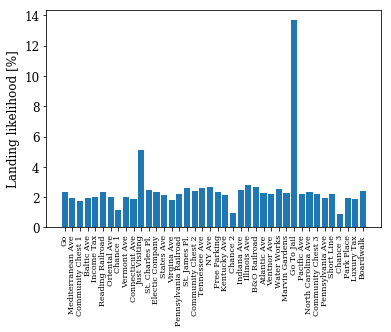

In [16]:
x = np.arange(mb.number_of_spaces)
plt.bar(x, 100*mb.space_visits/norm)
_ = plt.xticks(x, mb.space_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")

In [17]:
#Indices for just the property spaces
inds = [(space.kind == "Property" or space.kind == "Railroad") for space in mb.spaces]
prop_names = []
for space in mb.spaces:
    if space.kind == "Property" or space.kind == "Railroad":
        prop_names.append(space.name)
space_visits = np.array(mb.space_visits[inds])
x = np.arange(len(space_visits))

Text(0,0.5,'Landing likelihood [%]')

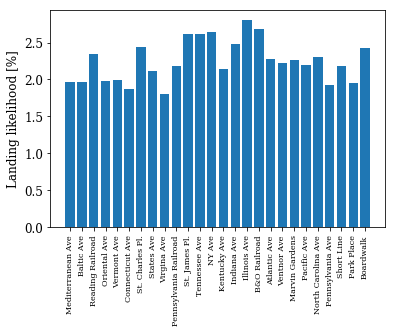

In [21]:
plt.bar(x, 100*space_visits/norm)
_ = plt.xticks(x, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")

Text(0,0.5,'Landing likelihood [%]')

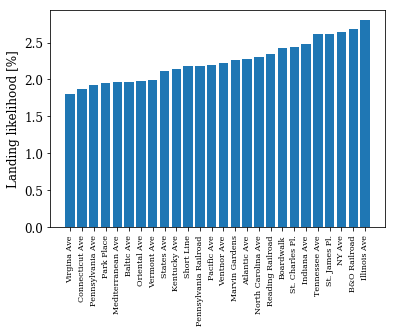

In [22]:
#Now order by likelihood
order = np.argsort(space_visits)
ordered_space_visits = np.array([space_visits[i] for i in order])
ordered_prop_names = [prop_names[i] for i in order]
plt.bar(x, 100*ordered_space_visits/norm)
_ = plt.xticks(x, ordered_prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")

# Rent weighted value

The value of a space is actually going to be the rent times the likelihood it gets landed on. In this example, owning one railroad is grouped with basic rent. This will make the railroads very valuable at this stage.

[ 2.  4. 25.  6.  6.  8. 10. 10. 12. 25. 14. 14. 16. 18. 18. 20. 25. 22.
 22. 24. 26. 26. 28. 25. 35. 50.]
30.83756345177665


Text(0,0.5,'Value [Rel. to BW]')

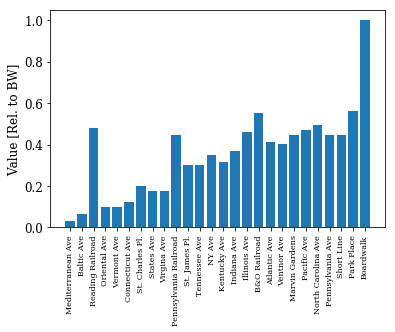

In [23]:
rents = []
for space in mb.spaces:
    if space.kind == "Property":
        rents.append(space.rent)
    elif space.kind == "Railroad":
        rents.append(space.RR_rents[0])
rents = np.array(rents)
print(rents)
value = space_visits * rents
print(value[-1]/value[0])
plt.bar(x, value/np.max(value))
_ = plt.xticks(x, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Value [Rel. to BW]")

[ 250.  450.  200.  550.  550.  600.  750.  750.  900.  200.  950.  950.
 1000. 1050. 1050. 1100.  200. 1150. 1150. 1200. 1275. 1275. 1400.  200.
 1500. 2000.]
9.62566844919786


Text(0,0.5,'Hotel or 4-Railroads Value [Rel. to BW]')

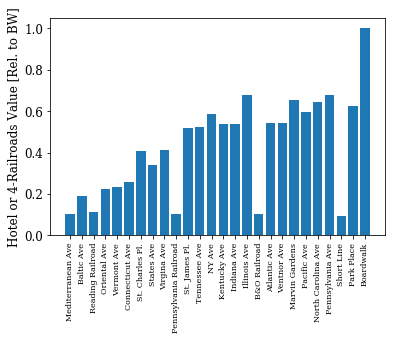

In [9]:
rents = []
for space in mb.spaces:
    if space.kind == "Property":
        rents.append(space.building_rents[4])
    elif space.kind == "Railroad":
        rents.append(space.RR_rents[3])
rents = np.array(rents)
print(rents)
value = space_visits * rents
print(value[-1]/value[0])
plt.bar(x, value/np.max(value))
_ = plt.xticks(x, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Hotel or 4-Railroads Value [Rel. to BW]")

We immediately see some interesting facts. First, in the earlygame, railroads are comparable to the greens and Park Place. That is, having a single railroad is as valuable as any of those places. In the endgame, when everyone can afford hotels, having four railroads makes them individually equal in worth to Mediterranean Avenue (the worst, by far). Same as when we looked at properties alone, we have to look at property+railroads in their groups to see how they all stack up, but we can tell by eye that the railroads won't be better than even the light blues.

## Statistics by property+railroad groups

In [24]:
group_names = ["Baltic","Connecticut","Virginia","New York","Illinois",
               "Marvin Gardens","Pennsylvania","Boardwalk", "Railroads"]
group_rents = np.zeros(9)
group_visits = np.zeros(9)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.rent*2 #NOTE THE FACTOR OF 2!
        #The 2 is there because now properties are different than railroads.
        group_visits[space.group] += mb.space_visits[i]
    if space.kind == "Railroad":
        group_rents[space.group] += space.RR_rents[0]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits

Text(0,0.5,'Group Base Rent Value [Rel. to BW]')

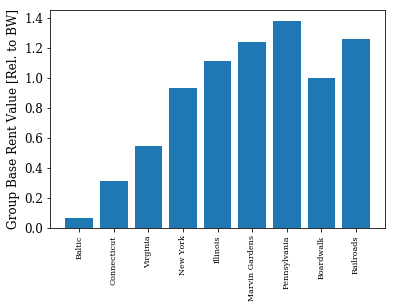

In [25]:
x = np.arange(len(group_names))
plt.bar(x, group_values/np.max(group_values[-2]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group Base Rent Value [Rel. to BW]")

This plot is kind of difficult to interpret, because it's showing the value of properties when you hold a monopoly (the whole of a group) without buildings compared to the value of all the railroads but only charging for owning a single one. So, mentally, if you slash the railroad bar into a quarter, you come to the obvious conclusion that owning a single railroad is worse than having a monopoly.

It will be more useful to compare the 4-railroad rent with having one or more houses.

Text(0,0.5,'Group 1-House (4-RR) Value [Rel. to BW]')

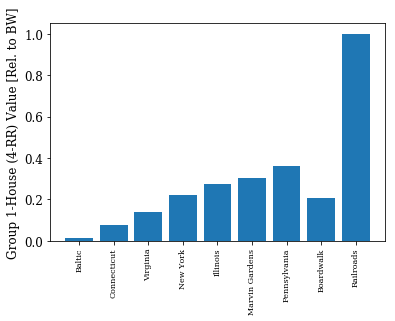

In [13]:
group_rents = np.zeros(9)
group_visits = np.zeros(9)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[0]
        group_visits[space.group] += mb.space_visits[i]
    if space.kind == "Railroad":
        group_rents[space.group] += space.RR_rents[3]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group 1-House (4-RR) Value [Rel. to BW]")

Text(0,0.5,'Group 2-House (4-RR) Value [Rel. to BW]')

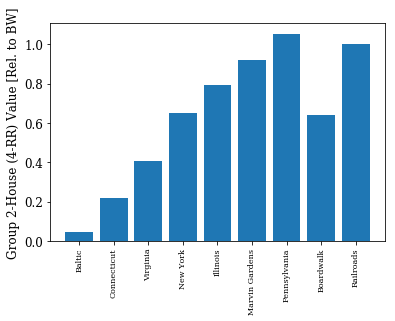

In [31]:
group_rents = np.zeros(9)
group_visits = np.zeros(9)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[1]
        group_visits[space.group] += mb.space_visits[i]
    if space.kind == "Railroad":
        group_rents[space.group] += space.RR_rents[3]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group 2-House (4-RR) Value [Rel. to BW]")

Text(0,0.5,'Group 3-House (4-RR) Value [Rel. to BW]')

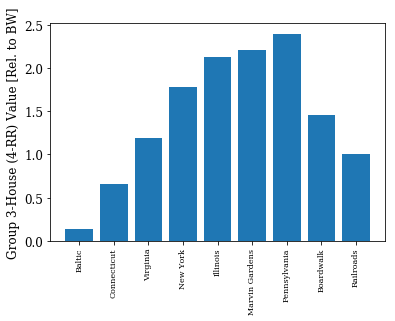

In [32]:
group_rents = np.zeros(9)
group_visits = np.zeros(9)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[2]
        group_visits[space.group] += mb.space_visits[i]
    if space.kind == "Railroad":
        group_rents[space.group] += space.RR_rents[3]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group 3-House (4-RR) Value [Rel. to BW]")

Text(0,0.5,'Group Hotel (4-RR) Value [Rel. to BW]')

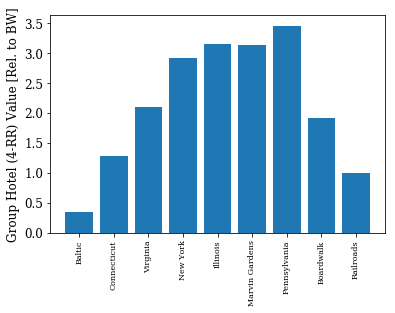

In [14]:
group_rents = np.zeros(9)
group_visits = np.zeros(9)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[4]
        group_visits[space.group] += mb.space_visits[i]
    if space.kind == "Railroad":
        group_rents[space.group] += space.RR_rents[3]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group Hotel (4-RR) Value [Rel. to BW]")

## Results

More interesting results! The railroads actually add something to the game and aren't just terrible outright. Specifically, having all the railroads is better than having an individual Monopoly if you can't put many houses down. Even 1-house boardwalk group is wayyy worse than having all four railroads. This is only reversed when you can get to 3 houses, in which case the 4 railroads are only better than the Baltic and Connecticut 3-house Monopolies. In the very endgame with hotels, the Railroads are only better than the Baltic group.